In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "toscana"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,9,Toscana,2,0,2,0,2,2,2,...,0.0,156.0,0.0,0.0,0.00,100.00,1.28,0.00,0.00,0.000
1,2020-02-26T18:00:00,9,Toscana,2,0,2,0,2,0,0,...,0.0,67.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.000
2,2020-02-27T18:00:00,9,Toscana,2,0,2,0,2,0,0,...,0.0,47.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.000
3,2020-02-28T18:00:00,9,Toscana,5,0,5,2,7,5,6,...,0.0,27.0,0.0,2.0,0.00,71.43,22.22,0.00,0.00,300.000
4,2020-02-29T17:00:00,9,Toscana,7,0,7,3,10,3,3,...,0.0,94.0,0.0,1.0,0.00,70.00,3.19,0.00,0.00,42.857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2020-11-15T17:00:00,9,Toscana,1734,274,2008,50300,52308,1247,2653,...,44.0,18737.0,8496.0,1184.0,13.65,3.84,14.16,31.23,3.01,5.196
265,2020-11-16T17:00:00,9,Toscana,1777,284,2061,51790,53851,1543,2433,...,36.0,15527.0,6513.0,1490.0,13.78,3.83,15.67,37.36,3.65,4.651
266,2020-11-17T17:00:00,9,Toscana,1792,277,2069,52083,54152,301,2361,...,52.0,15695.0,6961.0,293.0,13.39,3.82,15.04,33.92,-2.46,4.384
267,2020-11-18T17:00:00,9,Toscana,1805,282,2087,52023,54110,-42,2508,...,55.0,22365.0,10475.0,-60.0,13.51,3.86,11.21,23.94,1.81,4.631


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 19, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1972
Nuovi tamponi: 17830.0
Percentuale nuovi positivi/nuovi tamponi: 11.1 %
Nuovi guariti: 1907.0
Nuovi deceduti: 51.0
Variazione positivi ricoverati con sintomi: 9.0
Variazione positivi in terapia intensiva: 5.0
Variazione positivi in isolamento dimiciliare: 0.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 19, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-20T17:00:00,9,Toscana,86,23,109,2847,2956,129,147,...,0.0,8036.0,5365.0,129.0,21.10,3.69,1.83,2.74,9.52,5.200
1,2020-09-21T17:00:00,9,Toscana,94,23,117,2901,3018,62,84,...,0.0,4138.0,3169.0,54.0,19.66,3.88,2.03,2.65,0.00,2.842
2,2020-09-22T17:00:00,9,Toscana,98,21,119,2939,3058,40,74,...,0.0,5632.0,3568.0,38.0,17.65,3.89,1.31,2.07,-8.70,2.452
3,2020-09-23T17:00:00,9,Toscana,97,24,121,2933,3054,-4,90,...,1.0,7502.0,4699.0,-6.0,19.83,3.96,1.20,1.92,14.29,2.943
4,2020-09-24T17:00:00,9,Toscana,95,24,119,3037,3156,102,156,...,0.0,7710.0,4962.0,104.0,20.17,3.77,2.02,3.14,0.00,5.108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-15T17:00:00,9,Toscana,1734,274,2008,50300,52308,1247,2653,...,44.0,18737.0,8496.0,1184.0,13.65,3.84,14.16,31.23,3.01,5.196
57,2020-11-16T17:00:00,9,Toscana,1777,284,2061,51790,53851,1543,2433,...,36.0,15527.0,6513.0,1490.0,13.78,3.83,15.67,37.36,3.65,4.651
58,2020-11-17T17:00:00,9,Toscana,1792,277,2069,52083,54152,301,2361,...,52.0,15695.0,6961.0,293.0,13.39,3.82,15.04,33.92,-2.46,4.384
59,2020-11-18T17:00:00,9,Toscana,1805,282,2087,52023,54110,-42,2508,...,55.0,22365.0,10475.0,-60.0,13.51,3.86,11.21,23.94,1.81,4.631


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

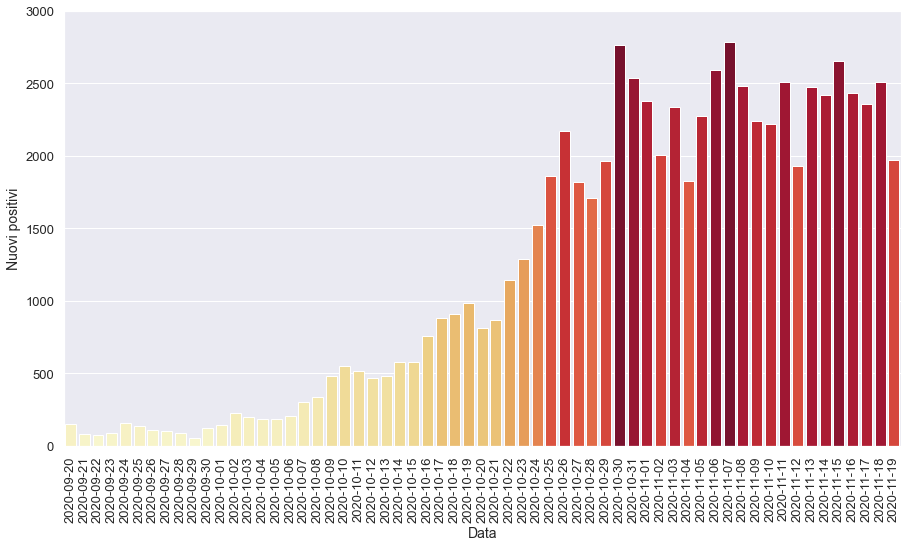

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

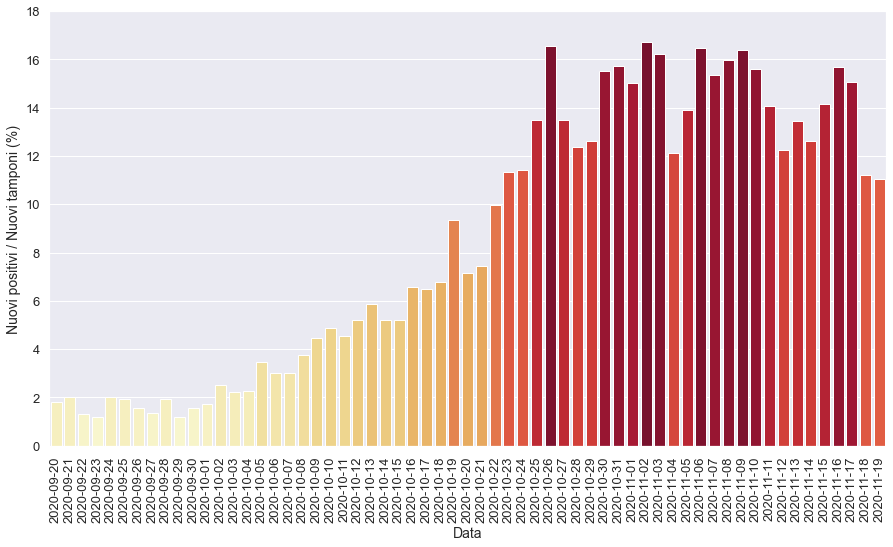

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

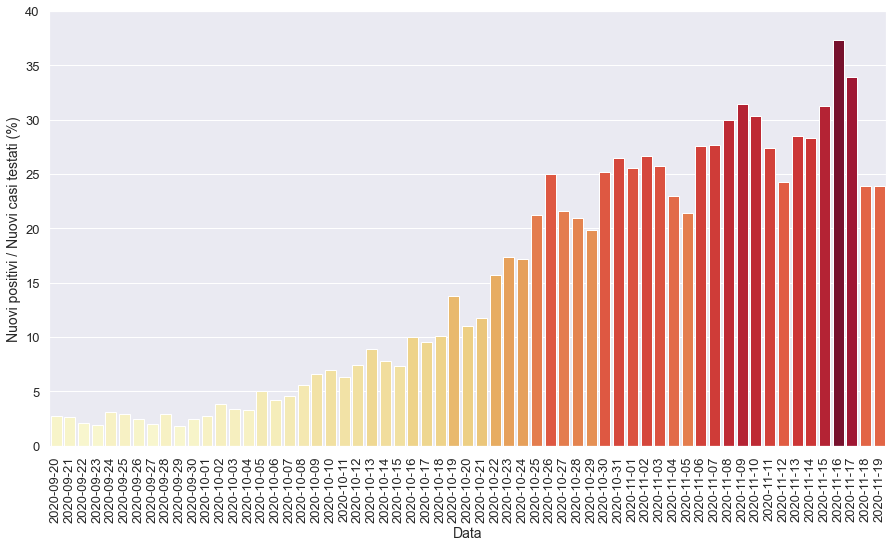

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

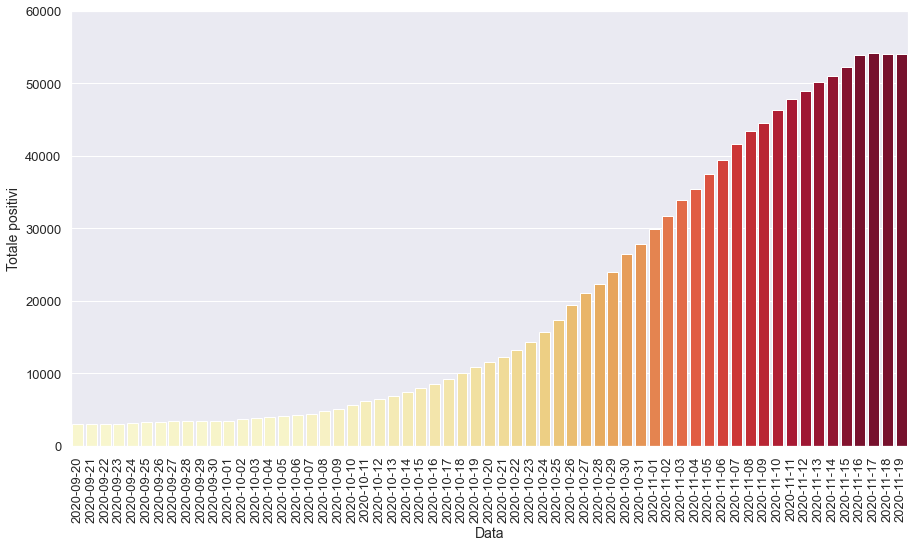

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

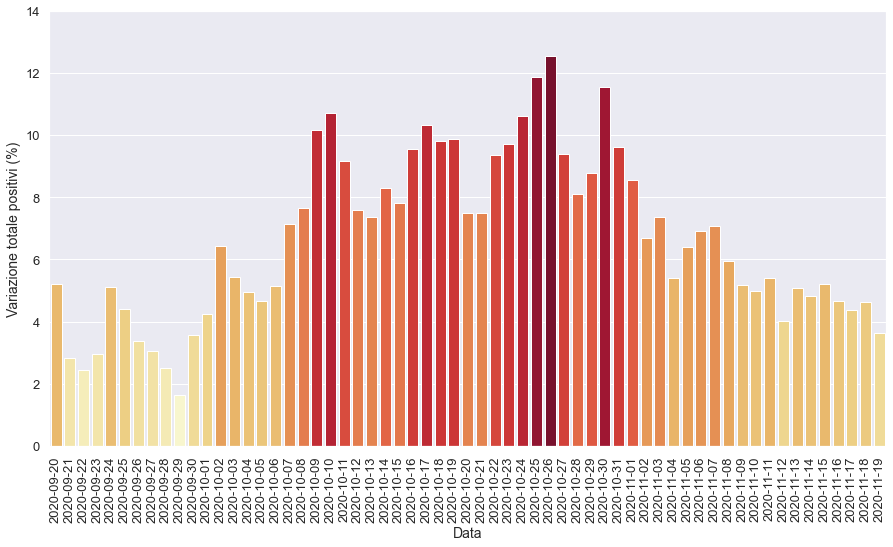

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

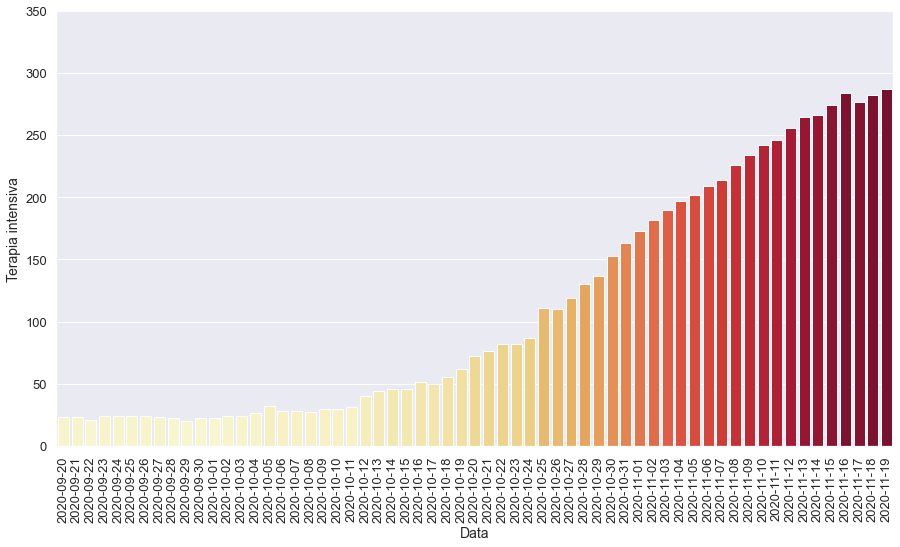

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

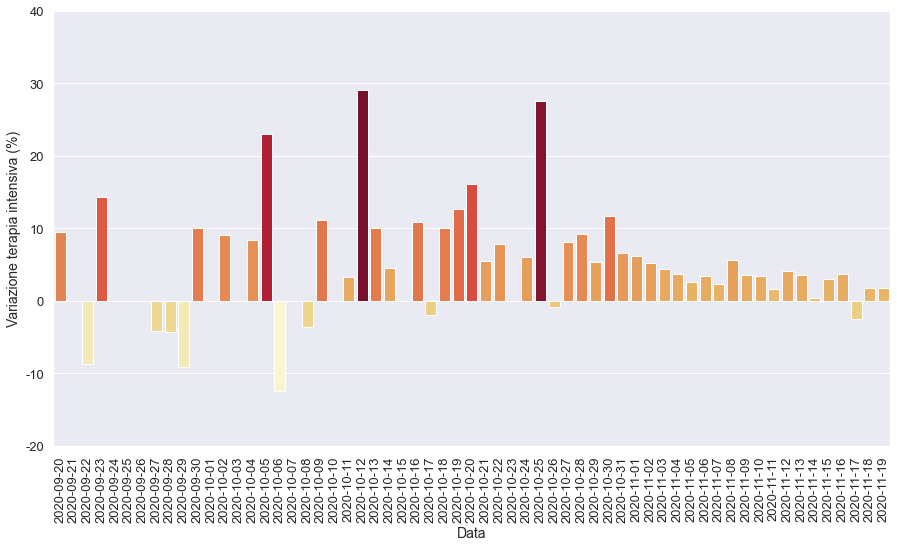

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

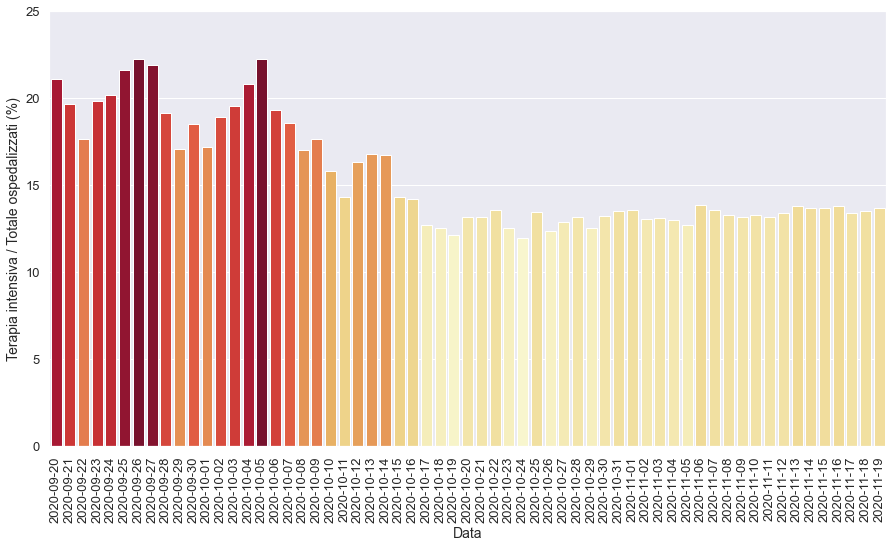

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

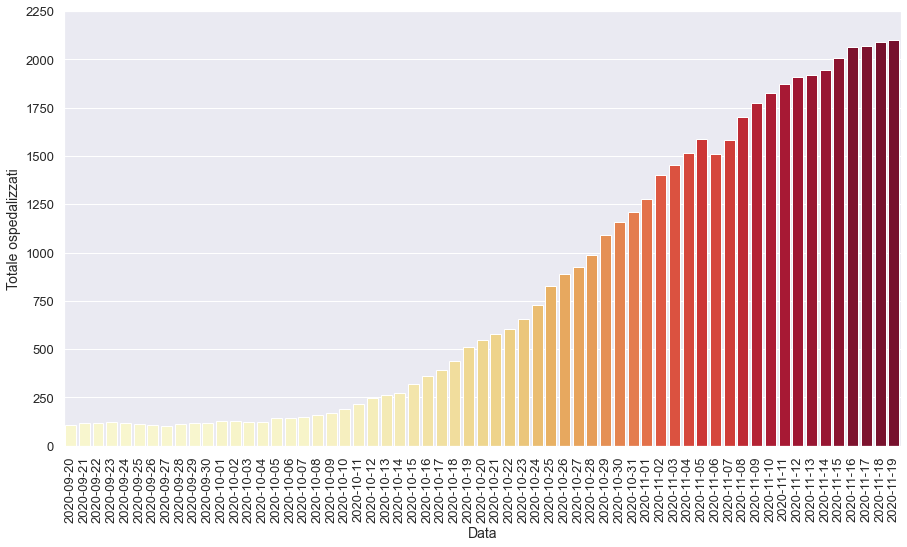

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

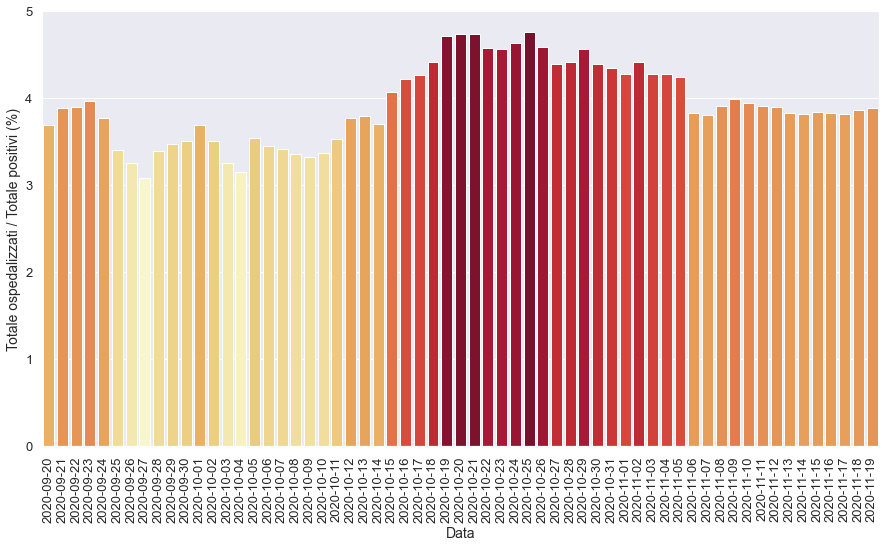

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

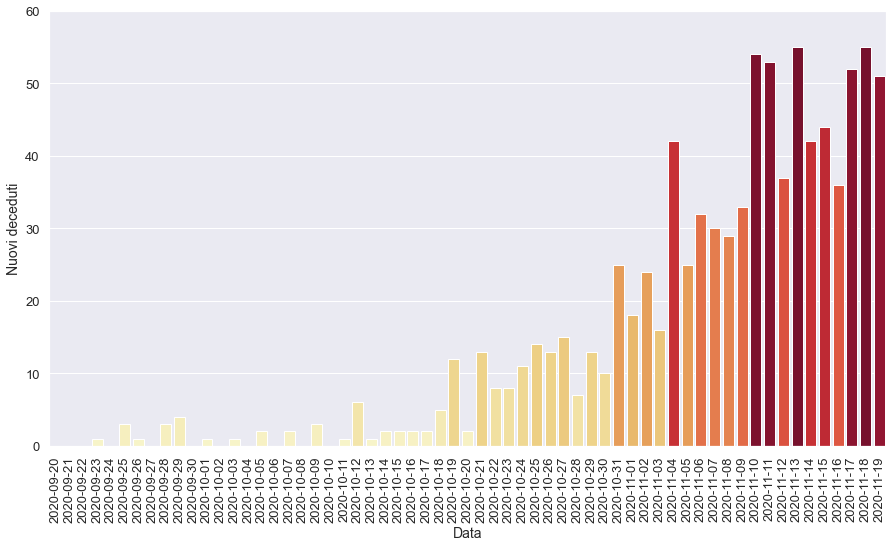

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

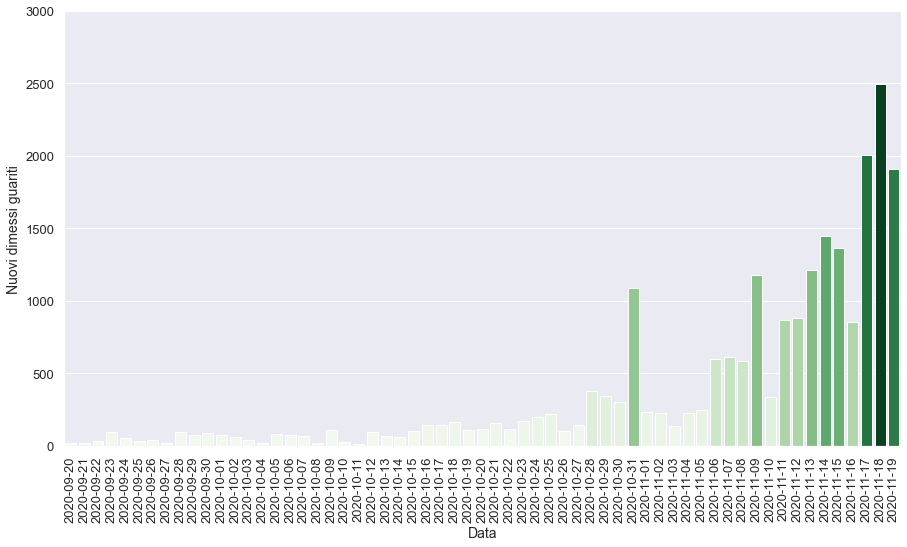

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-20T17:00:00,9,Toscana,475,72,547,10999,11546,695,812,...,2.0,11351.0,7359.0,659.0,13.16,4.74,7.15,11.03,16.13,7.483
1,2020-10-21T17:00:00,9,Toscana,503,76,579,11660,12239,693,866,...,13.0,11629.0,7359.0,661.0,13.13,4.73,7.45,11.77,5.56,7.500
2,2020-10-22T17:00:00,9,Toscana,524,82,606,12655,13261,1022,1145,...,8.0,11495.0,7270.0,995.0,13.53,4.57,9.96,15.75,7.89,9.355
3,2020-10-23T17:00:00,9,Toscana,574,82,656,13718,14374,1113,1290,...,8.0,11378.0,7442.0,1063.0,12.50,4.56,11.34,17.33,0.00,9.728
4,2020-10-24T17:00:00,9,Toscana,640,87,727,14961,15688,1314,1526,...,11.0,13369.0,8886.0,1243.0,11.97,4.63,11.41,17.17,6.10,10.616
5,2020-10-25T17:00:00,9,Toscana,714,111,825,16495,17320,1632,1863,...,14.0,13811.0,8781.0,1534.0,13.45,4.76,13.49,21.22,27.59,11.875
6,2020-10-26T17:00:00,9,Toscana,779,110,889,18487,19376,2056,2171,...,13.0,13122.0,8672.0,1992.0,12.37,4.59,16.54,25.03,-0.90,12.535
7,2020-10-27T17:00:00,9,Toscana,804,119,923,20117,21040,1664,1823,...,15.0,13502.0,8439.0,1630.0,12.89,4.39,13.50,21.60,8.18,9.409
8,2020-10-28T17:00:00,9,Toscana,857,130,987,21373,22360,1320,1708,...,7.0,13811.0,8156.0,1256.0,13.17,4.41,12.37,20.94,9.24,8.118
9,2020-10-29T17:00:00,9,Toscana,956,137,1093,22877,23970,1610,1966,...,13.0,15594.0,9904.0,1504.0,12.53,4.56,12.61,19.85,5.38,8.792


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

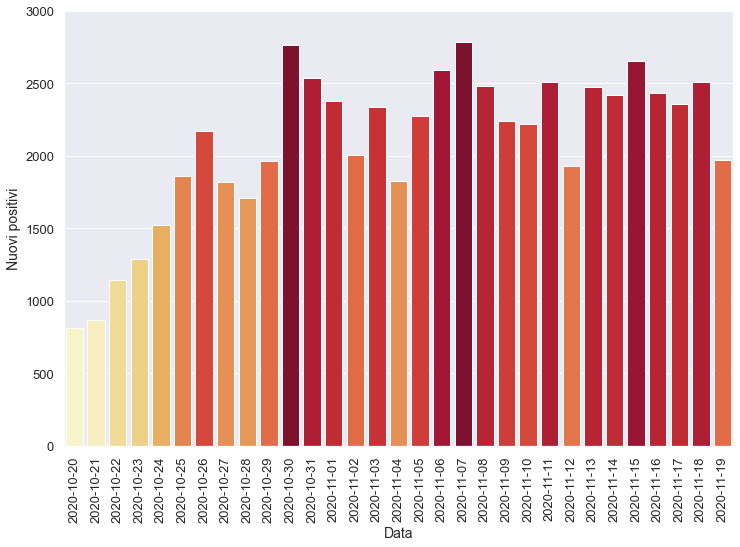

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

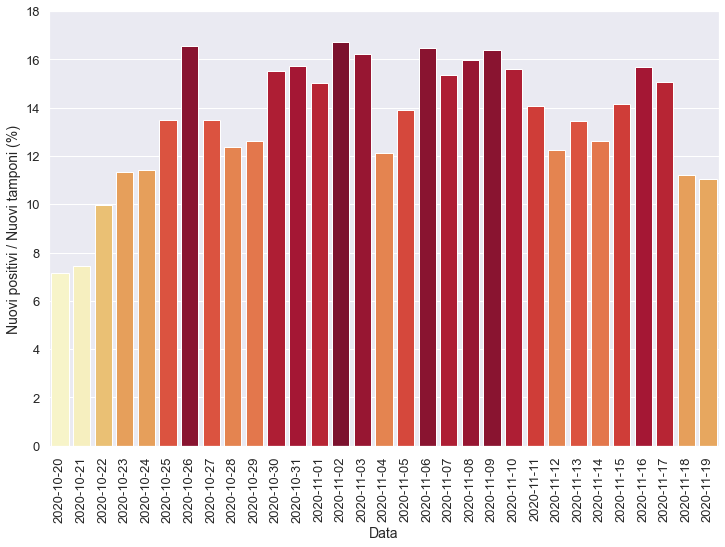

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

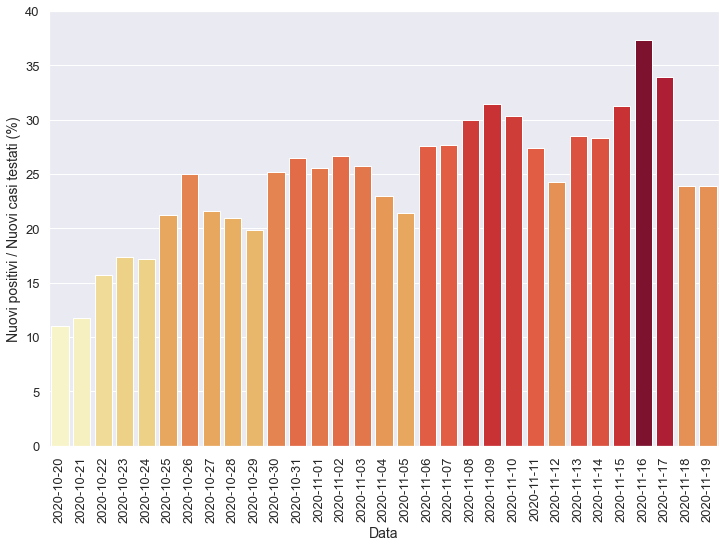

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

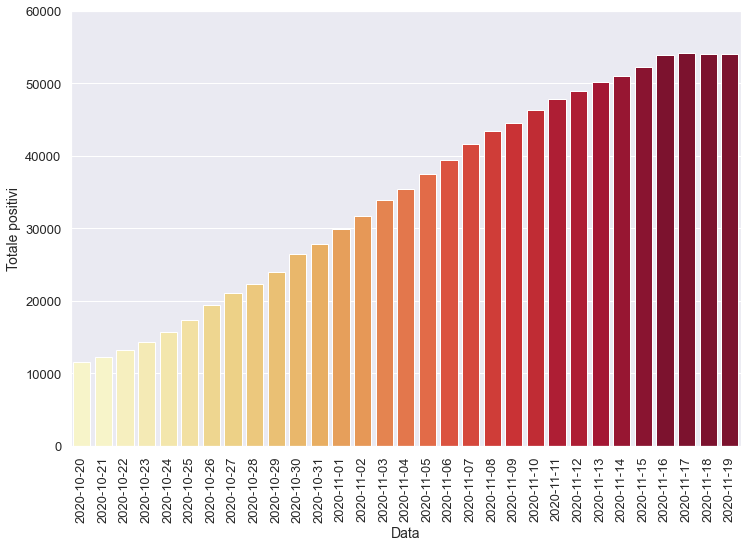

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

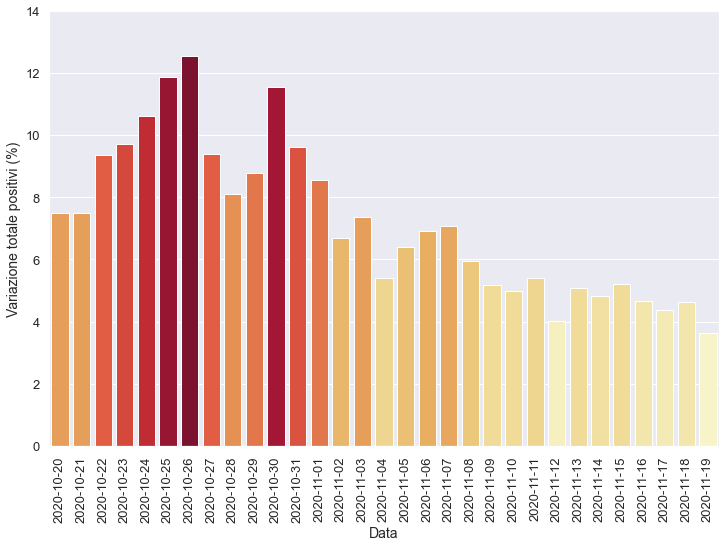

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

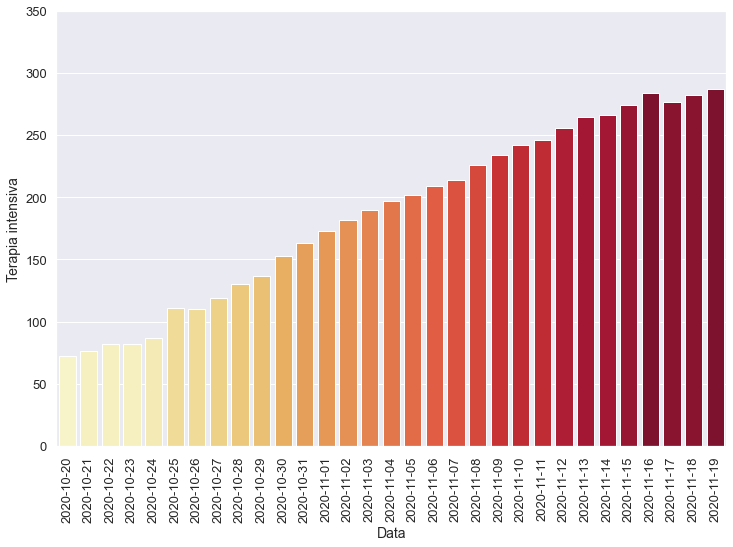

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

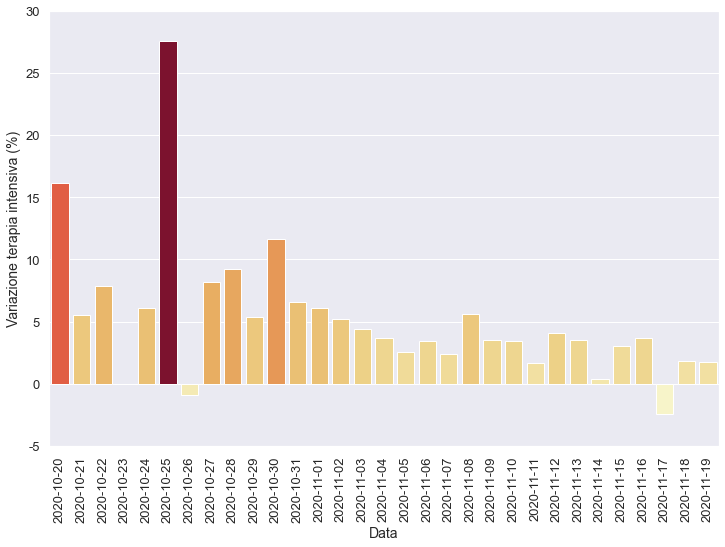

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

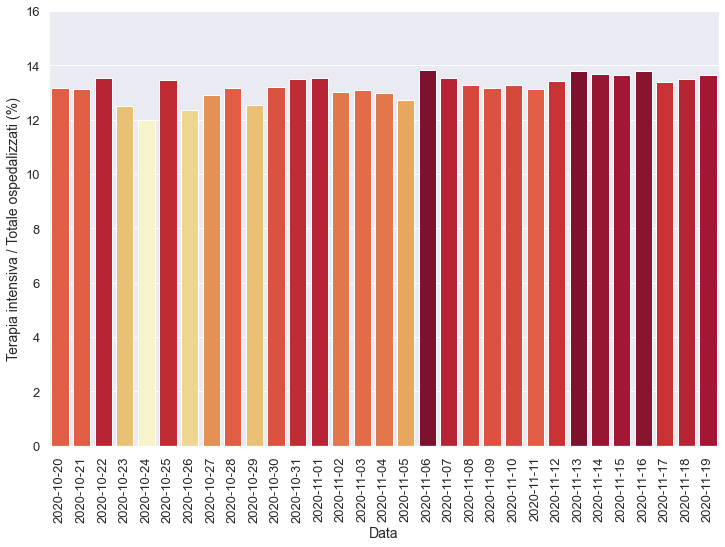

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

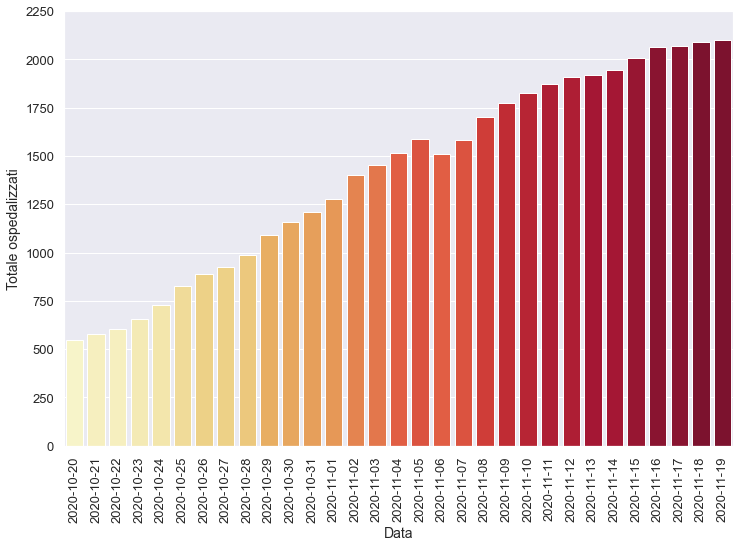

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

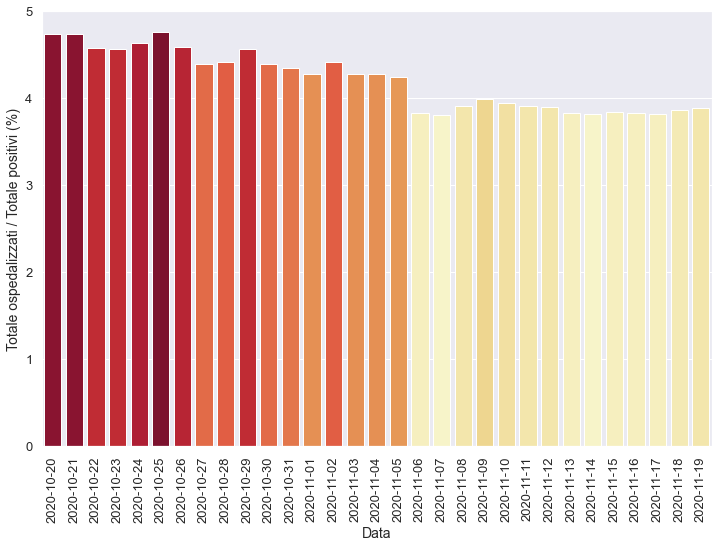

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

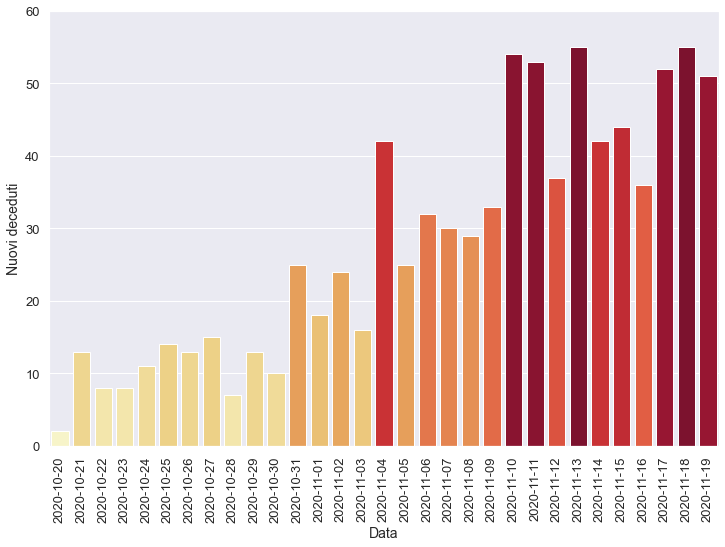

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

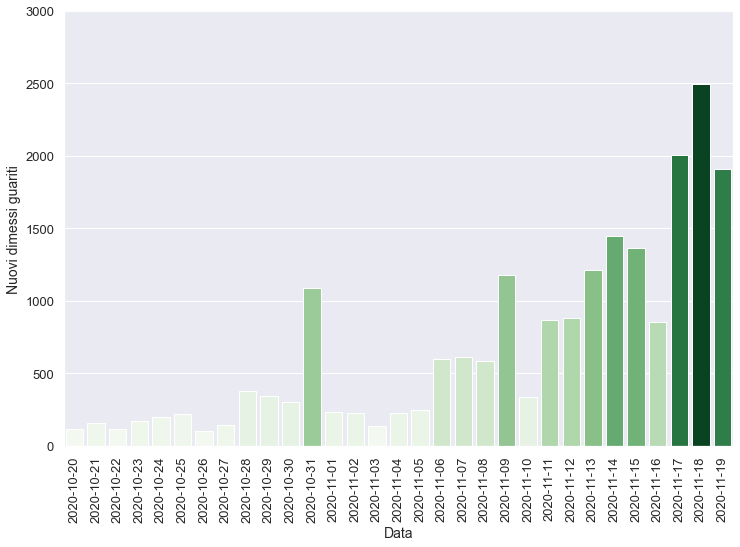

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-12T17:00:00,9,Toscana,1653,256,1909,47007,48916,1016,1932,...,37.0,15786.0,7960.0,981.0,13.41,3.90,12.24,24.27,4.07,4.033
1,2020-11-13T17:00:00,9,Toscana,1656,265,1921,48208,50129,1213,2478,...,55.0,18423.0,8687.0,1201.0,13.79,3.83,13.45,28.53,3.52,5.066
2,2020-11-14T17:00:00,9,Toscana,1679,266,1945,49116,51061,932,2420,...,42.0,19184.0,8551.0,908.0,13.68,3.81,12.61,28.30,0.38,4.828
3,2020-11-15T17:00:00,9,Toscana,1734,274,2008,50300,52308,1247,2653,...,44.0,18737.0,8496.0,1184.0,13.65,3.84,14.16,31.23,3.01,5.196
4,2020-11-16T17:00:00,9,Toscana,1777,284,2061,51790,53851,1543,2433,...,36.0,15527.0,6513.0,1490.0,13.78,3.83,15.67,37.36,3.65,4.651
5,2020-11-17T17:00:00,9,Toscana,1792,277,2069,52083,54152,301,2361,...,52.0,15695.0,6961.0,293.0,13.39,3.82,15.04,33.92,-2.46,4.384
6,2020-11-18T17:00:00,9,Toscana,1805,282,2087,52023,54110,-42,2508,...,55.0,22365.0,10475.0,-60.0,13.51,3.86,11.21,23.94,1.81,4.631
7,2020-11-19T17:00:00,9,Toscana,1814,287,2101,52023,54124,14,1972,...,51.0,17830.0,8244.0,0.0,13.66,3.88,11.06,23.92,1.77,3.644


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

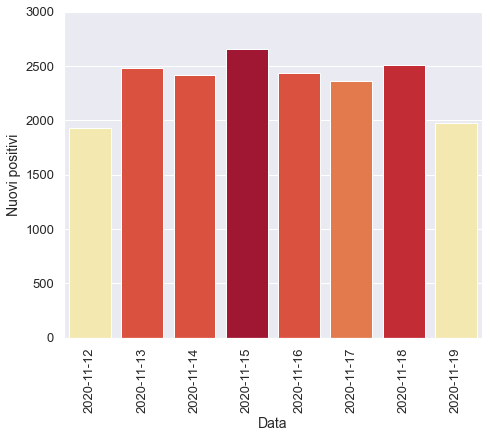

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

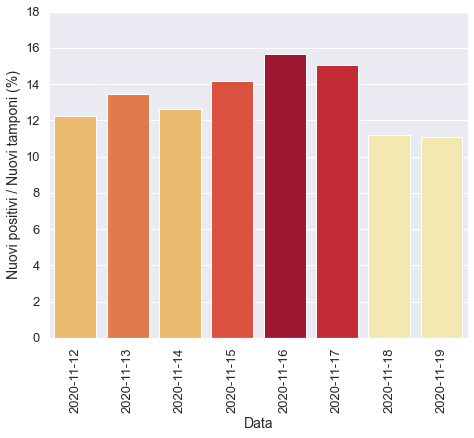

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

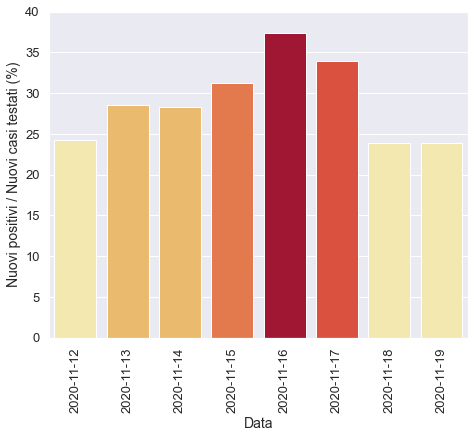

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

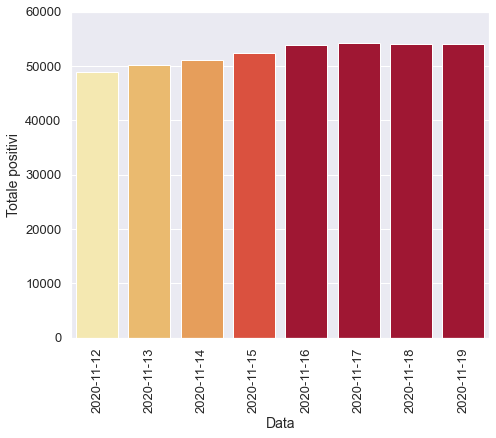

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

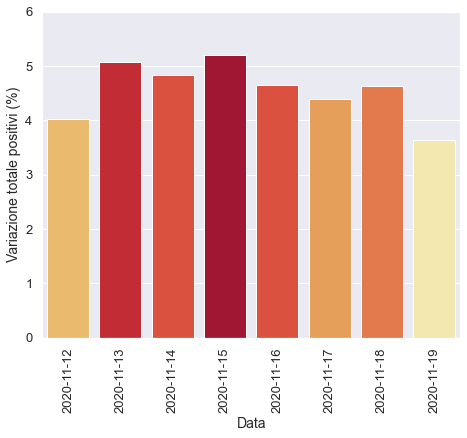

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

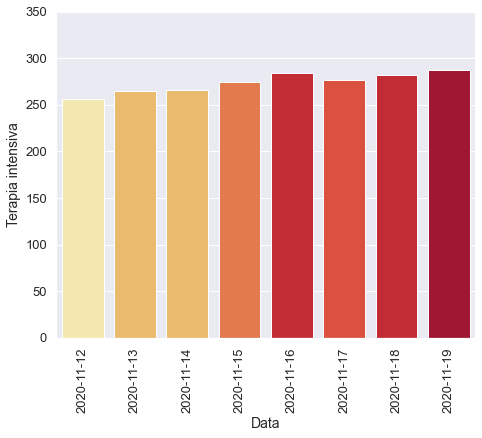

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

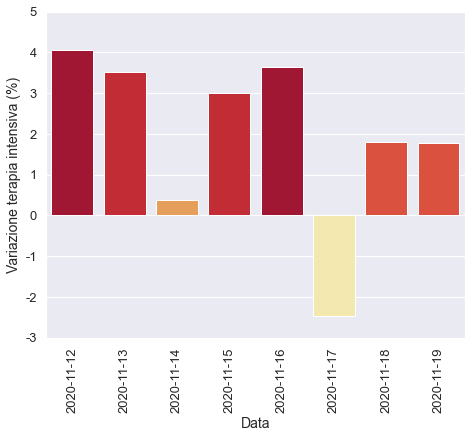

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

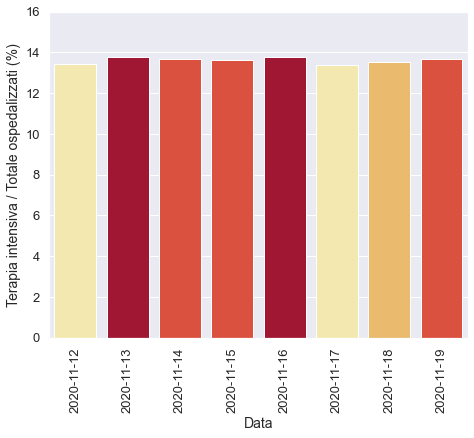

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

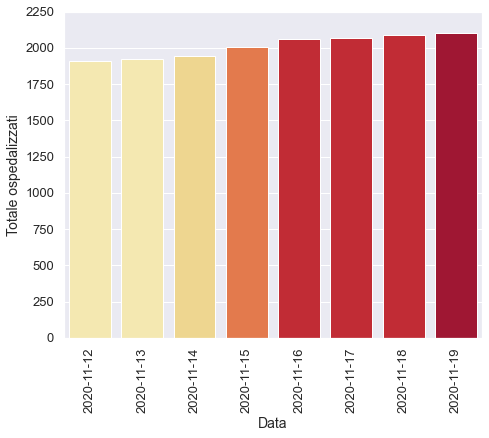

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

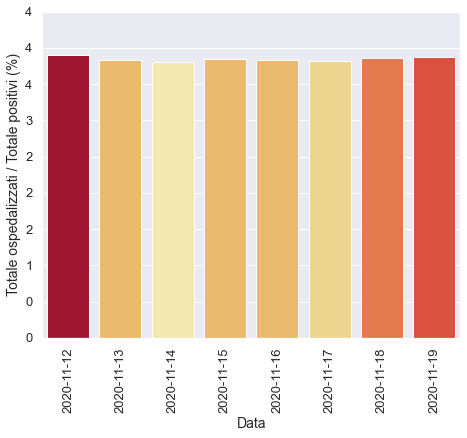

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

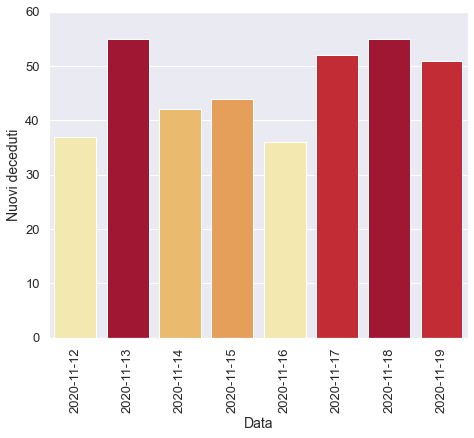

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

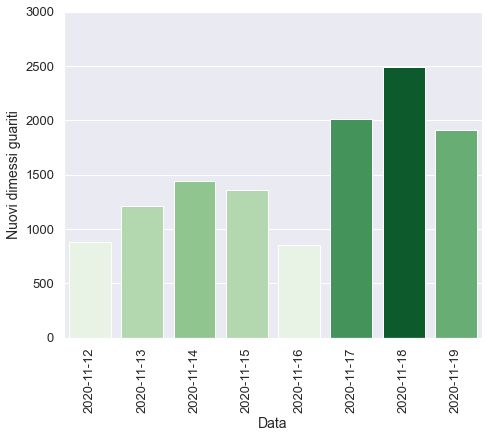

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)